# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users",users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

In [12]:
# columnas en users: 'city' 'churn date'
# columnas en usage: 'date' 'duration' 'length'

# acciones en orden de aparicion: imputar - eliminar - ignorar - imputar - imputar


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:

columnas_numericas_users = ['user_id', 'age']
print(users[columnas_numericas_users].describe())


            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` como es un identificador de usuario no hace falta mayor analisis de sus numeros
- La columna `age` se ve afectada por sentinels como -999 que deberan ser revisados y remplazados

In [14]:
columnas_numericas_usage = ['id','user_id']
print(usage[columnas_numericas_usage].describe())


                id       user_id
count  40000.00000  40000.000000
mean   20000.50000  12002.405975
std    11547.14972   1157.279564
min        1.00000  10000.000000
25%    10000.75000  10996.000000
50%    20000.50000  12013.000000
75%    30000.25000  13005.000000
max    40000.00000  13999.000000


- Las columnas `id` y `user_id`no parecen compartir identificadores identicos debido a la denominacion numerica que se aprecia 
- Las columnas ...

In [15]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users[columnas_user].describe())

          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


- La columna `city` muestra a Bogota como la ciudad mas frecuente
- La columna `plan` el plan basico representa mas del 55% de los datos de la columna

In [16]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` muestra que 'text' es el metodo mas utilizado entre los usuarios con mas de la mitad de las entradas de la columna


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?
- en 'age' hay sentinels que seran reemplazados

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [17]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [18]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [19]:
print(users['reg_date'].unique())

['2022-01-01T00:00:00.000000000' '2022-01-01T06:34:17.914478619'
 '2022-01-01T13:08:35.828957239' ... '2024-12-30T10:51:24.171042768'
 '2024-12-30T17:25:42.085521392' '2024-12-31T00:00:00.000000000']


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

In [20]:
print(usage['date'].unique())


['2024-01-01T00:00:00.000000000' '2024-01-01T00:06:30.969774244'
 '2024-01-01T00:13:01.939548488' ... '2024-06-29T23:46:58.060451510'
 '2024-06-29T23:53:29.030225754' '2024-06-30T00:00:00.000000000']


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [21]:
users = users[users['age'] != '...']
print(users['age'])

0       38
1       53
2       57
3       69
4       63
        ..
3995    60
3996    24
3997    58
3998    57
3999    20
Name: age, Length: 4000, dtype: int64


In [22]:


# Reemplazar -999 por la mediana de age


# Calcular mediana excluyendo -999
age_mediana = users['age'][users['age'] != -999].median()

# Reemplazar -999 por la mediana
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios

users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [23]:
valores_nulos = pd.NA


users['city'] = users['city'].replace('?',valores_nulos )

users['city'].describe()


count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [24]:



# Marcar fechas mayores al año 2024 como NaT
users.loc[users['reg_date'] > '2024-12-31', 'reg_date'] = np.nan

# Verificar cuántas fechas se marcaron
print(f"Fechas fuera de rango: {(users['reg_date'] > '2024-12-31').sum()}")


Fechas fuera de rango: 0


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [25]:

# Verificación MAR en usage (Missing At Random) para duration
mar_duration = usage['duration'].isna().groupby(usage['type']).mean()



In [26]:

# Verificación MAR en usage (Missing At Random) para length
mar_length = usage['length'].isna().groupby(usage['type']).mean()


In [27]:
print(mar_duration)
print(mar_length)

type
call    0.000000
text    0.999276
Name: duration, dtype: float64
type
call    0.99933
text    0.00000
Name: length, dtype: float64


Ambas columnas representan valores correctos en el analisis, ya que podemos esperar cierta 'duracion' en las llamadas pero no en mensajes de texto por lo cual 'text' muestra tantos MAR
y en el caso de 'length' podemos ver algo similar pero en este caso podemos esperar cierta longitud de un texto pero no de una llamada tomando en cuenta que ya tenemos una metrica de duracion para la llamada

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [28]:


# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage['duration'] = usage['length'] 
# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}) .reset_index()

# observar resultado
usage_agg.head(3)



,user_id,is_text,is_call,duration
0,10000,7,3,258.0
1,10001,5,10,226.0
2,10002,5,2,225.0


In [29]:
usage_agg = usage_agg.rename(columns={ 'is_text': 'cant_mensajes', 'is_call': 'cant_llamadas', 'duration': 'cant_minutos_llamada'})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,258.0
1,10001,5,10,226.0
2,10002,5,2,225.0


In [30]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile =  users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,258.0
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,226.0
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,225.0
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,530.0
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,229.0


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [31]:
# Resumen estadístico de las columnas numéricas
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
print('Informacion de columnas numericas')
print(user_profile[columnas_numericas].describe())
print()#salto de linea
print('Mediana de las columnas numericas')
print(user_profile[columnas_numericas].median())





Informacion de columnas numericas
               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  4000.000000    3999.000000    3999.000000           3999.000000
mean     48.136000       5.524381       4.478120            288.128032
std      17.689919       2.358416       2.144238            180.906841
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000            184.000000
50%      48.000000       5.000000       4.000000            268.000000
75%      63.000000       7.000000       6.000000            361.000000
max      79.000000      17.000000      15.000000           2028.000000

Mediana de las columnas numericas
age                      48.0
cant_mensajes             5.0
cant_llamadas             4.0
cant_minutos_llamada    268.0
dtype: float64


In [32]:
print('Distribución porcentual del tipo de plan')

users['plan'].value_counts(normalize=True)*100




Distribución porcentual del tipo de plan


Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

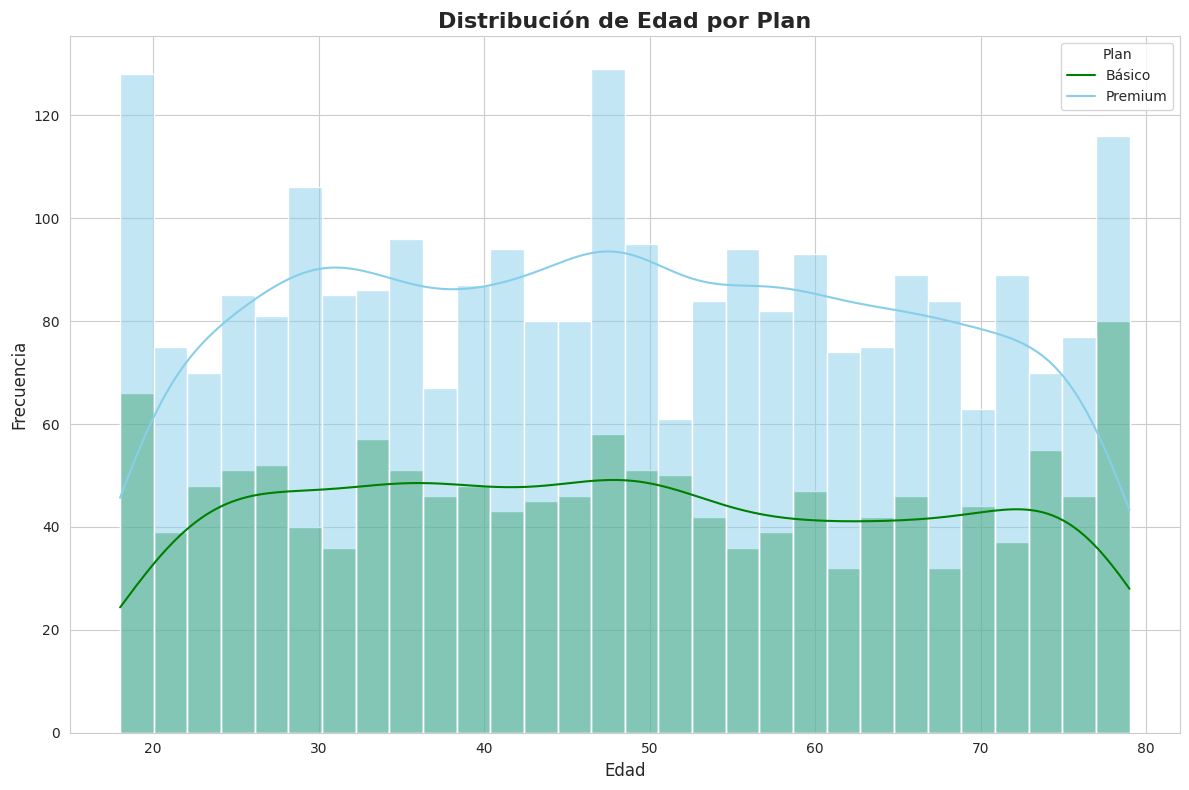

In [33]:

# Histograma para visualizar la edad (age)
# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Histograma de age (edad de los usuarios)

sns.histplot(data=users, x='age', hue='plan', palette=['skyblue', 'green'], kde=True, bins=30)
plt.title('Distribución de Edad por Plan', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan', labels=['Básico', 'Premium'])
plt.tight_layout()
plt.show()


💡Insights: 
- Distribución ...

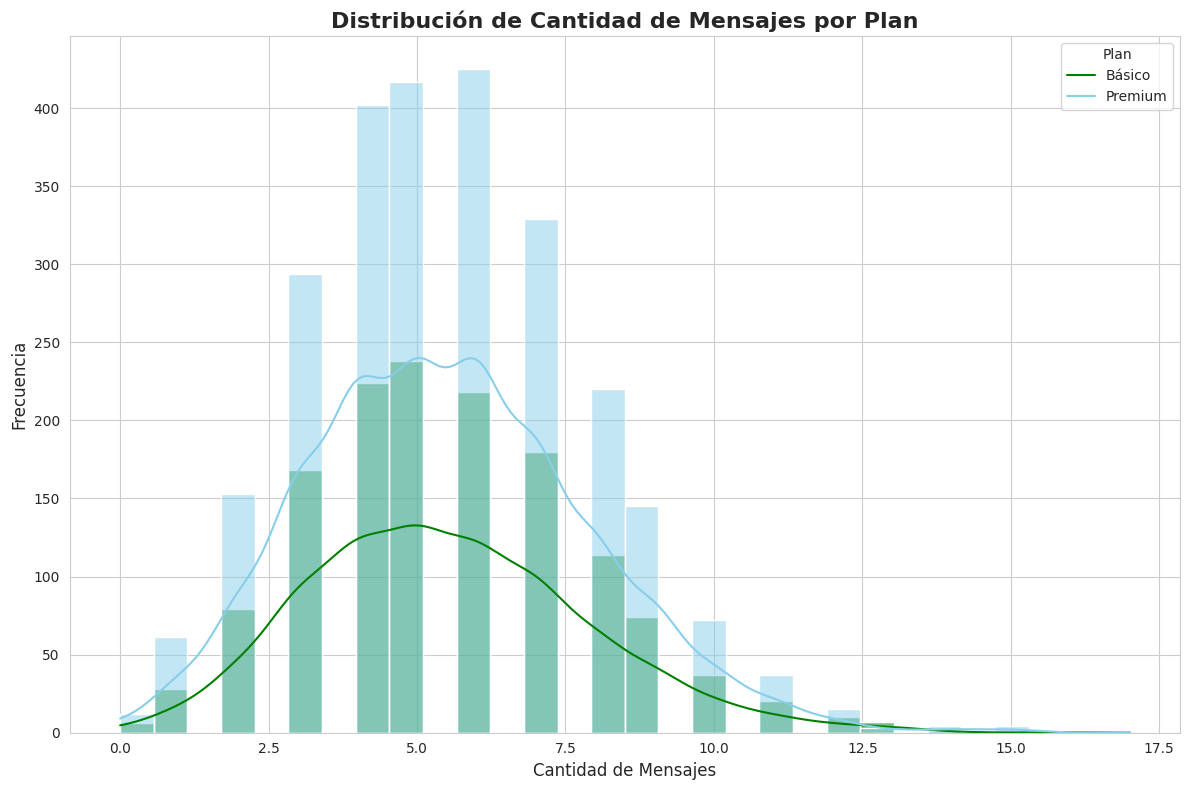

In [34]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue', 'green'], kde=True, bins=30)
plt.title('Distribución de Cantidad de Mensajes por Plan', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Mensajes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan', labels=['Básico', 'Premium'])
plt.tight_layout()
plt.show()

💡Insights: 
- ....

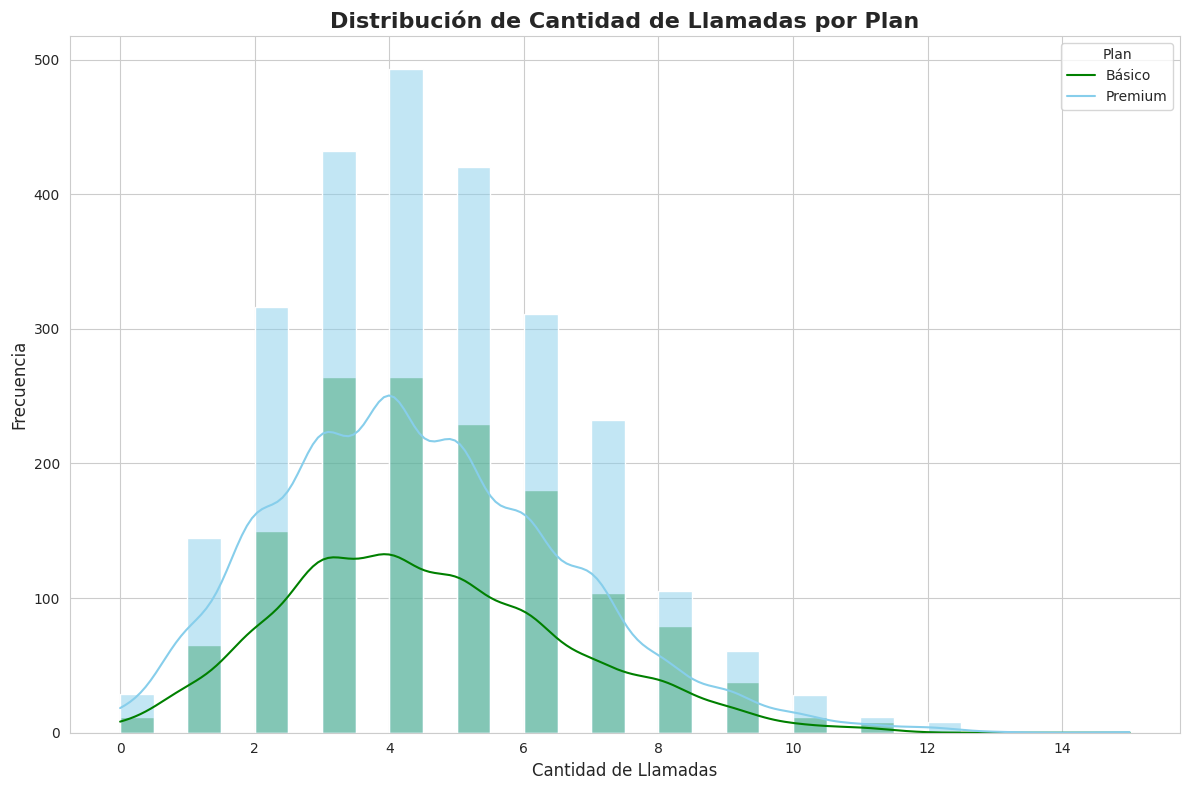

In [35]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue', 'green'], kde=True, bins=30)
plt.title('Distribución de Cantidad de Llamadas por Plan', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Llamadas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan', labels=['Básico', 'Premium'])
plt.tight_layout()
plt.show()

💡Insights: 
- Distribución ...

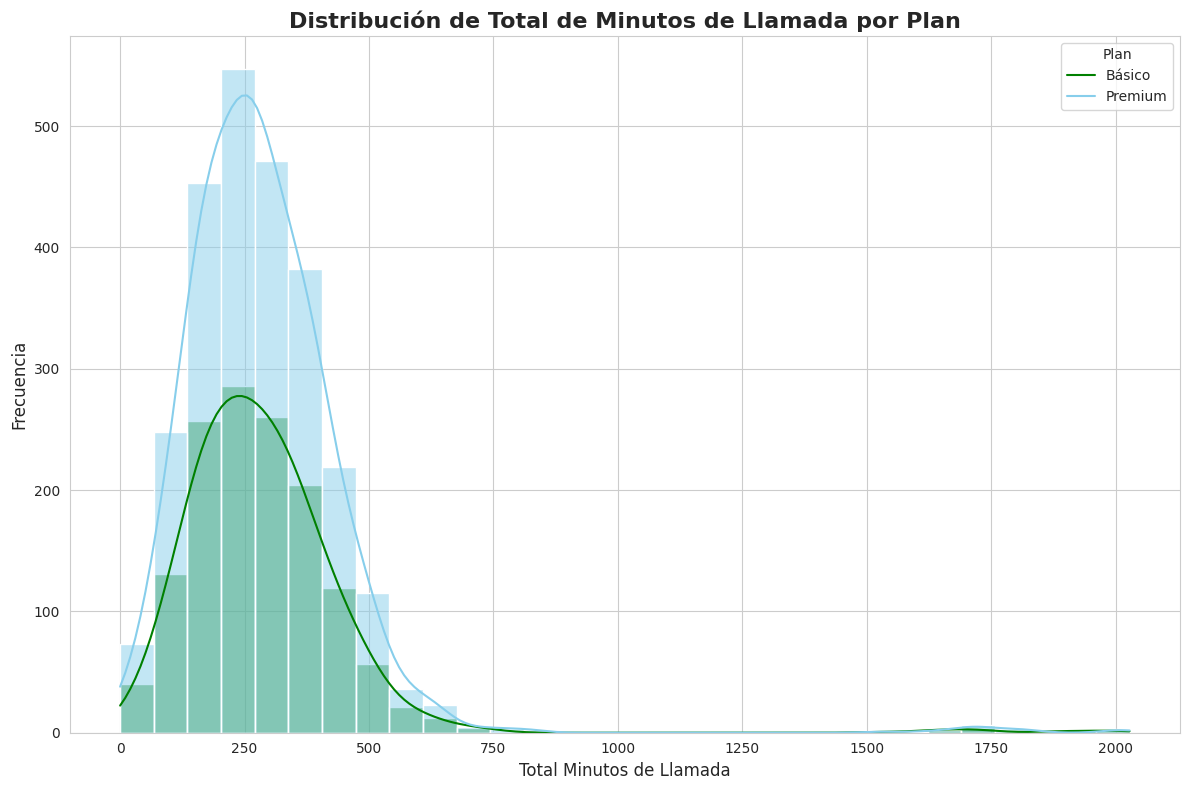

In [36]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue', 'green'], kde=True, bins=30)
plt.title('Distribución de Total de Minutos de Llamada por Plan', fontsize=16, fontweight='bold')
plt.xlabel('Total Minutos de Llamada', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan', labels=['Básico', 'Premium'])
plt.tight_layout()
plt.show()

💡Insights: 
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

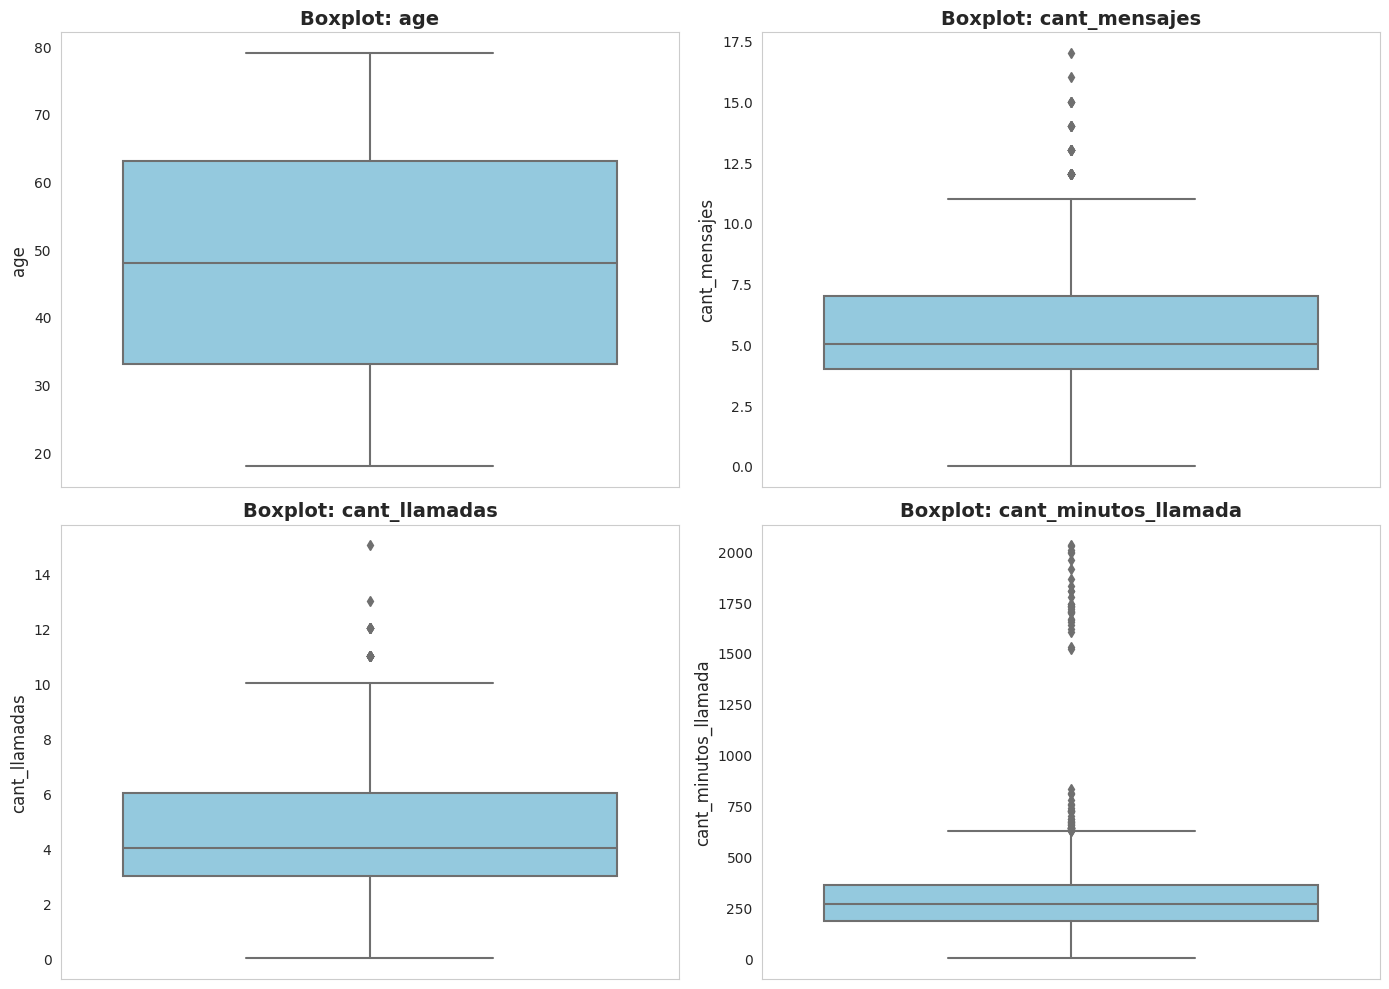

In [37]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(columnas_numericas):
    sns.boxplot(data=user_profile, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

💡Insights: 
- Age: ... no muestra outliers
- cant_mensajes: ... muestra outliers pero por la naturaleza de la columna podria esperarse dichos outliers
- cant_llamadas: ... misma conclusion a la columna mensajes
- cant_minutos_llamada: ... muestra outliers significaticos, probable un error de registro 

In [38]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = user_profile[(user_profile[col] < limite_inferior) | 
                            (user_profile[col] > limite_superior)]
    
    if len(outliers) > 0:
        print(f"\n{'='*60}")
        print(f"OUTLIERS EN {col.upper()} ({len(outliers)} registros):")
        print(f"{'='*60}")
        print(outliers[[ col]].head(5))  
        print()


OUTLIERS EN CANT_MENSAJES (46 registros):
     cant_mensajes
315           13.0
347           13.0
356           12.0
384           12.0
456           12.0


OUTLIERS EN CANT_LLAMADAS (30 registros):
     cant_llamadas
116           11.0
417           12.0
777           12.0
778           11.0
862           15.0


OUTLIERS EN CANT_MINUTOS_LLAMADA (68 registros):
     cant_minutos_llamada
71                 2007.0
315                 656.0
344                 686.0
347                 724.0
381                1957.0



In [39]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,288.128032
std,2.358416,2.144238,180.906841
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,184.000000
50%,5.000000,4.000000,268.000000
75%,7.000000,6.000000,361.000000
max,17.000000,15.000000,2028.000000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener, porque se pueden esperar dichos valores elevados por la naturaleza de la columna
- cant_llamadas: mantener o no outliers, porqué? mantener, porque se pueden esperar dichos valores elevados por la naturaleza de la columna
- cant_minutos_llamada: mantener o no outliers, porqué? eliminar o winsorizar, porque es probable que haya sido un error de registro en el corte de la llamada

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [40]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'Bajo uso',
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
        'Uso medio',
        'Alto uso'
    )
)

In [41]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,258.0,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,226.0,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,225.0,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,530.0,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,229.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [42]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    (user_profile['age']<30), 'Joven',
    np.where(
        (user_profile['age']<60), 'Adulto',
        'Adulto Mayor'
    )
)

In [43]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,258.0,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,226.0,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,225.0,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,530.0,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,229.0,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

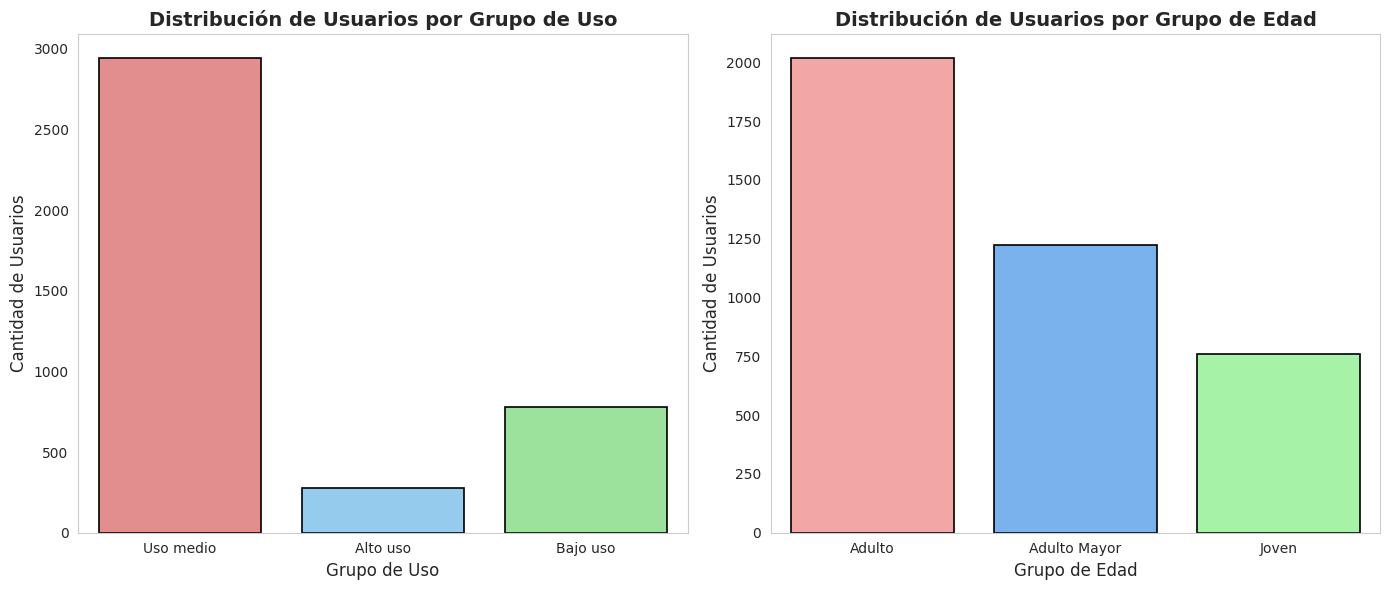

In [44]:

# Visualización de los segmentos por uso
# Configurar el estilo
sns.set_style("whitegrid")

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: countplot para grupo_uso
sns.countplot(data=user_profile, x='grupo_uso', ax=axes[0], 
              palette=['lightcoral', 'lightskyblue', 'lightgreen'], 
              edgecolor='black', linewidth=1.2)
axes[0].set_title('Distribución de Usuarios por Grupo de Uso', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Grupo de Uso', fontsize=12)
axes[0].set_ylabel('Cantidad de Usuarios', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)


# Gráfico 2: countplot para grupo_edad
sns.countplot(data=user_profile, x='grupo_edad', ax=axes[1], 
              palette=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'], 
              edgecolor='black', linewidth=1.2)
axes[1].set_title('Distribución de Usuarios por Grupo de Edad', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Cantidad de Usuarios', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)



plt.tight_layout()
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
en el DF de 'users' churn date contaba con casi el 90% de los datos siendo nulos, en el mismo DF city contaba con solo el 11% de sus datos siendo NA

en el DF de usage encontramos que Length y duration contaban con alrededor del 50% de valores nulos, pero con analizis mas profundo entendimos que se debia a la naturaleza de las columnas y por eso aparecian nulas

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
  se ve que contamos con mayor numero de ususarios 'Adultos' tamgbien que contamos con un uso medio muy elevado
  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?

  el segmento de edad y la diferencai de uso segun el plan basico o premium

  con la edad podemos buscar a publico especifico al cual enfocarnos, o ver a que clase de clientes nos hace falta atraer, la diferencia entre planes nos deja observar el rendimiento de uso de cada plan entre los clientes, permitiendonos enfocar en ofrecer cosas mas atractivas para los planes premium o incluso el basico

  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
En la duracion de llamada, puede ser a un problema de registro del corte de llamada, o en algun caso completamente anromal que 2 personas no desconcectaron una llamada por 33 hrs.

tomando en cuenta lo mas probable, es probable que el resto de valores inflados se deban a problemas con el registro de cuandos e corta la llamada, probable se tenga que ver directamente con el servidor

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

  recoemndaria el mejorar los planes premium para poder ser mas atractivos, asi como enfocarse en seguir siendo atractivos para su clientela principal de adultos, ya sea con promociones o mejoras en sus planes actuales, tambien se podrian enfocar en la clientela mas joven, ya que en el histograma se muestra como el segmento de <20 años muestra gran interes por los paquetes premium, pero su poblacion de clientes joven es baja

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Errores de formato
- outliers en duracion de llamada
- sentinels y valores nulos


🔍 **Segmentos por Edad**
- Adulto es el mayor numero de clientes
- Joven es el segmento de edad con menor cantidad de clientes
- adulto mayor cuenta con un poco mas de la mitad de cleintes que tiene Adulto


📊 **Segmentos por Nivel de Uso**
- 'uso medio' es considerablemente el nivel de uso mas ocurrente con casi 3000 usuarios
- bajo uso queda segundo con casi 1000 usuarios

➡️ Esto sugiere que ... la mayoria de los usuarios utilizan de manera muy regular sus planes telefonicos, que no necesitan mas ventajas de las que ya tienen


💡 **Recomendaciones**
- hacer mas atractivo el plan 'basico' para atraer a mas clientela que no siente que necesite un plan con mas ventajas, esto debido a que podemos esperar que no van a utilizar absolutamente todo lo que ofrece de uso el plan
- hacer mas atractivo el plan 'premium' para retener a los usuarios actuales si es que se busca mas el mejorar el plan basico 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`